<div style="font-weight: bold;" align="center">
    <div style="font-size: xx-large">Procesos estocásticos</div><br>
    <div style="font-size: x-large;">Entrega 1</div><br>
    <div style="font-size: large">María Barroso Honrubia</div><br></div><hr>
</div>

In [2]:
import arrival_process_simulation as arrival
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate, special

---

### Ejercicio 1

*Se pide*
- *Demostrar que $P(N(t)=n)=\frac{1}{n!}\lambda^nt^ne^{-\lambda t}$*.
- *Simular un proceso de Poisson de parámetro $\lambda=10$ para $t=2$ y calcular la distribución empírica de $P(N(t)=n)$ para validar el resultado anterior.*

---

Para ello, vamos a comenzar desarrollando $P[N(t+\Delta t)=n]$ como una suma de las diferentes probabilidades de los sucesos posibles. Es decir:
- Hay $n$ sucesos al tiempo $t$ y a tiempo $t+\Delta$ no hay ningún suceso.
- Hay $n-1$ sucesos a tiempo $t$ y a tiemo $t+\Delta$ hay un suceso.
- ...
- No hay ningún suceso a tiempo $t$ y hay $n$ sucesos al tiempo $t+\Delta$.

Para simplificar la notación, vamos a considerar $P_{t;n}=P[N(t)=n]$ y $P_{\Delta t;n}=P[\Delta N(t)=n]$.

$$P_{t+\Delta t;n}= \sum_{i=0}^n P_{t;n-i}P_{\Delta t;i} = 
P_{t;n}P_{\Delta t;0} + P_{t;n-1}P_{\Delta t;1} + \sum_{i=2}^{n}P_{t;n-i}P_{\Delta t;i}
$$

Como $P_{\Delta t;0}=1-\lambda\Delta t + o(\Delta t)$, $P_{\Delta t;1}=\lambda\Delta t + o(\Delta t)$ y $P_{\Delta t;n\geq2} = o(\Delta t)$, la anterior expresión resulta en

$$P_{t+\Delta t;n}=P_{t;n}(1-\lambda t) + P_{t;n-1}\lambda t + o(\Delta t)$$,

que puede reescribirse como:

$$P_{t+\Delta t;n}-P_{t;n}= -\lambda\Delta t P_{t;n} + P_{t;n-1}\lambda\Delta t + o(\Delta t)$$

Tomando el límite $\Delta t \to 0^+$, cada sumando tiende a 0 y puede utilizarse el límite $\Delta t \to 0$, obteniéndose la ecuación diferencial:

$$
\frac{d}{dt}P_{t;n} =  \lambda(-P_{t;n} + P_{t;n-1})
$$

Puede comprobarse que $\frac{1}{n!} \lambda^n t^n e^{-\lambda t}$ es solución de la EDO, esto es, que su derivada respecto a $t$ coincide con la anterior expresión y que se cumple la condición inicial $P_{0;0}=1$.

$$\begin{aligned}
\frac{d}{dt} \left(\frac{1}{n!} \lambda^n t^n e^{-\lambda t}\right) &= \frac{\lambda^n}{n!} \left(n t^{n-1}e^{-\lambda t} - \lambda t^ne^{-\lambda t}\right) \\
&= \frac{1}{(n-1)!} \lambda^n t^{n-1} e^{-\lambda t} - \frac{1}{n!} \lambda^{n+1} t^n e^{-\lambda t} \\
&= \lambda \left(\frac{1}{(n-1)!} \lambda^{n-1} t^{n-1} e^{-\lambda t} - \frac{1}{n!} \lambda^n t^n e^{-\lambda t}\right) \\
&= \lambda\left( P_{n-1} - P_n \right) \\
\\
\frac{1}{n!} \lambda^n t^n e^{-\lambda t} &= 1 \mbox{ para $n=t=0$}
\end{aligned}$$


A continuación, resolveremos la EDO utilizando inducción, pero antes conviene introducir el factor $e^\lambda t$ en la expresión:

$$
\frac{d}{dt}\left(e^{\lambda t}P_{t;n}\right) =  \lambda e^{\lambda t} P_{t;n} + e^{\lambda t}\frac{d}{dt}P_{t;n} = \lambda e^{\lambda t} P_{t;n} +e^{\lambda t}\lambda\left(-P_{t;n} + P_{t;n-1}\right) = \lambda P_{t;n-1} e^{\lambda t}
$$

Para $n=0$, podemos resolverla facilmente utilizando que $P_{t;0}=e^{-\lambda t}$ (prueba en el enunciado del ejercicio)

$$
\frac{d}{dt}\left(e^{\lambda t}P_{t;0}\right) = \frac{d}{dt}\left(e^{\lambda t}e^{-\lambda t}\right) = 0
$$

Para $n=1$
$$
\frac{d}{dt}\left(e^{\lambda t}P_{t;1}\right) = \lambda P_{t;0} e^{\lambda t} = \lambda e^{-\lambda t} e^{\lambda t} = \lambda \implies e^{\lambda t}P_{t;1} = \int_0^t \lambda d\tau= \lambda t
$$

Para $n=2$
$$
\frac{d}{dt}\left(e^{\lambda t}P_{t;2}\right) = \lambda e^{\lambda t} P_{t;1}  = \lambda^2 t \implies e^{\lambda t}P_{t;2} = \int_0^t \lambda^2 \tau d\tau = \frac{1}{2}\lambda\tau
$$

Utilizando inducción, se demuestra que:

$$\begin{aligned}
e^{\lambda t}P_{t;n}&=\frac{1}{n!}\lambda^nt^n\\
P_{t;n}&=\frac{1}{n!}\lambda^nt^ne^{-\lambda t}
\end{aligned}$$

En segundo lugar, vamos a realizar una simulación del proceso de Poisson, y se comparará con la distribución teórica.

In [11]:
# Parameters of the Poisson process
lambda_rate = 10
t0, t1 = 0.0, 2.0
M = 50000
T = 41

# Simulated distribution
arrival_times = arrival.simulate_poisson(t0, t1, lambda_rate, M)
N = np.array([len(a) for a in arrival_times])
pmf_est = np.bincount(N, minlength=T)/M

# Theoretical distribucion
X = np.arange(T)
pmf_theo = (lambda_rate*t1)**X * np.exp(-lambda_rate*t1) / special.factorial(X)

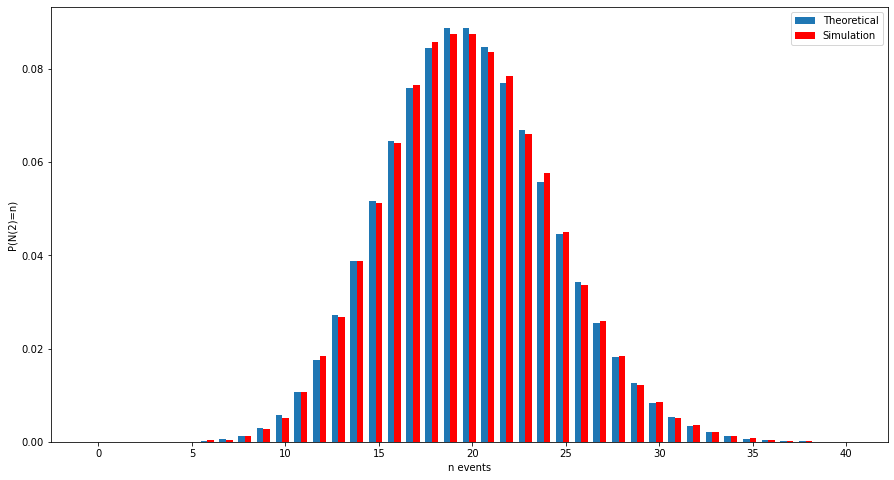

In [12]:
width = 0.35
plt.figure(figsize=(15,8))
plt.bar(X-width, pmf_theo,width=width, label='Theoretical',align='center')
plt.bar(X, pmf_est,color='r',width=width, label='Simulation',align='center')
plt.xlabel('n events')
plt.ylabel('P(N(2)=n)')
plt.legend()
plt.show()

---
### Ejercicio 2

*Se pide simular un proceso de Poisson de parámetro $\lambda=5$ y mostrar que las distribuciones empíricas del primer, segundo, quinto y décimo evento siguen la distribución teórica Erlang*
$$f_{S_n}(t)=\frac{\lambda^n t^{n-1} e^{-\lambda t}}{(n-1)!}$$

---

In [8]:
# Parameters of the Poisson process
lambda_rate = 5.0
N = np.array([1, 2, 5, 10])
t0 = 0.0
t1 = 6.0
M = 50000

# Simulación
arrival_times = arrival.simulate_poisson(t0, t1, lambda_rate, M)
arrival_n = [[a[n-1] for a in arrival_times] for n in N]

# Densidad teórica (Erlang)
def erlang(t, n, lambda_rate):
    return lambda_rate**n * t**(n-1)* np.exp(-lambda_rate*t) / special.factorial(n-1)

ts = np.linspace(0, t1, 100)
f_sn = [erlang(ts, n, lambda_rate) for n in N]

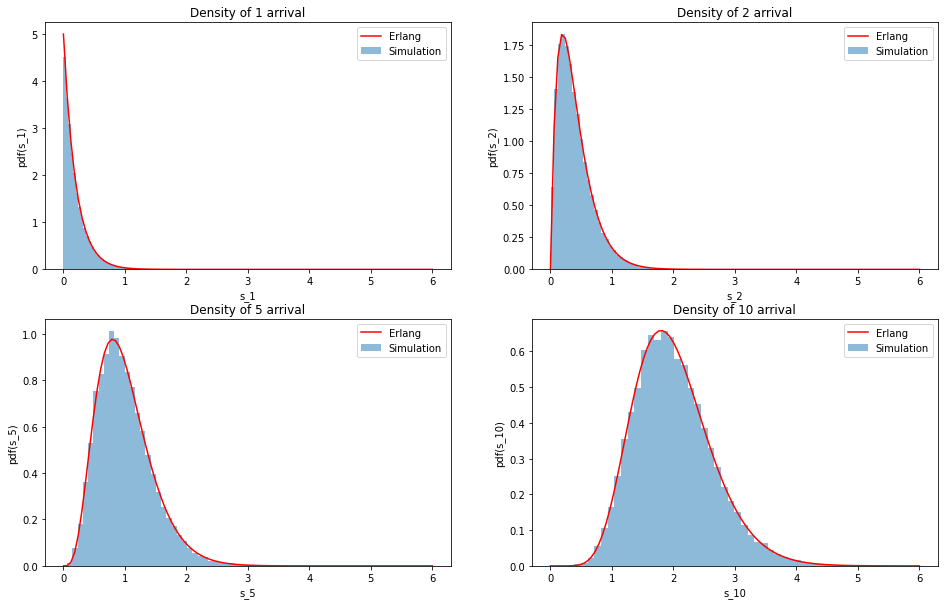

In [13]:
fig, axs = plt.subplots(2,2, figsize=(16, 10))
axs = axs.flatten()
for i in range(4):
    axs[i].hist(arrival_n[i], density=True, bins=50, label = 'Simulation', alpha=0.5)
    axs[i].plot(ts, f_sn[i],'r', label = 'Erlang')
    axs[i].set_xlabel(f's_{N[i]}')
    axs[i].set_ylabel(f'pdf(s_{N[i]})')
    axs[i].set_title(f'Density of {N[i]} arrival')
    axs[i].legend()

---

### Ejercicio 3

*Sea $\{N(t);t\geq 0\}$ un proceso de Poisson de razón $\lambda$. Se pide demostrar que la distribución de los tiempo entre llegadas $\{0<S_1<S_2<...<S_n\}$ condicionada a $N(t)=n$ coincide con la distribución del estadístico de orden de $n$ variables aleatorias i.i.d $U[0,t]$*
$$f_{\{S_{i}\}_{i=1}^n|N(t)}(\{s_i\}_{i=1}^n|n)=f_{\{U_{(i)}\}_{i=1}^n}=\frac{n!}{t^n}$$

---

Para ello, en primer lugar se va a utilizar el teorema de Bayes para calcular la densidad

$$
f_{\{S_{i}\}_{i=1}^{n+1}|N(t)}(\{s_i\}_{i=1}^{n+1}|n) = \frac{f_{\{S_{i}\}_{i=1}^{n+1}}(\{s_i\}_{i=1}^{n+1})f_{N(t)|\{S_i\}_{i=1}^{n+1}}(n|\{s_i\}_{i=1}^{n+1})}{f_{N(t)}(n)}
$$

Antes de desarollar las probabilidades de arriba, conviene darse cuenta de que $N(t)=n\Longleftrightarrow	s_n\leq t < s_{n+1}$, ya que

$$ f_{N(t)|\{S_i\}_{i=1}^{n+1}}(n|\{s_i\}_{i=1}^{n+1}) =  \begin{cases}
1  & s_n\leq t <s_{n+1} \\
 0 & \text{fotherwise}
\end{cases}$$

Por tanto, solo nos ocuparemos del caso $s_n\leq t < s_{n+1}$.

Ademas, $f_{\{S_{i}\}}$ sigue una distribución exponencial de parámetro $\lambda$ con $S_i$ i.i.d, luego, la expresión anterior resultado de aplicar Bayes resulta en

$$\begin{aligned}
f_{\{S_{i}\}_{i=1}^{n+1}|N(t)}(\{s_i\}_{i=1}^{n+1}|n) &= \frac{f_{\{S_{i}\}_{i=1}^{n+1}}(\{s_i\}_{i=1}^{n+1})}{f_{N(t)}(n)}\\
&=\frac{\lambda^{n+1}e^{\lambda s_{n+1}}}{\lambda^n t^n e^{-\lambda t}/n!} \\
&= \frac{\lambda e^{-\lambda(s_{n+1}-t)}n!}{t^n}
\end{aligned}$$


Por otro lado, $f_{\{S_{i}\}_{i=1}^{n+1}|N(t)}$ puede reescribirse como

$$f_{\{S_{i}\}_{i=1}^{n+1}|N(t)}(\{s_i\}_{i=1}^{n+1}|n) = f_{S_{n+1}|\{S_i\}_{i=1}^n,N(t)}(s_{n+1}|\{s_i\}_{i=1}^n,n)f_{\{S_i\}_{i=1}^n|N(t)}(\{s_i\}_{i=1}^n|n)$$

Y utilizando la propiedad de que los tiempos entre llegadas son un proceso sin memoria, para $s_{n+1}>t$, se tiene que

$$f_{S_{n+1}|\{S_i\}_{i=1}^n,N(t)}(s_{n+1}|\{s_i\}_{i=1}^n,n) = f_{S_{n+1}|N(t)}(s_{n+1}|n)$$

Utilizando esta propiedad y despejando $f_{\{S_i\}_{i=1}^n|N(t)}$ de la expresión, finalmente se prueba que

$$\begin{aligned}
f_{\{S_i\}_{i=1}^n|N(t)}(\{s_i\}_{i=1}^n|n) &= \frac{f_{\{S_{i}\}_{i=1}^{n+1}|N(t)}(\{s_i\}_{i=1}^{n+1}|n)}{f_{S_{n+1}|N(t)}(s_{n+1}|n)}\\
&=\frac{\lambda e^{-\lambda(s_{n+1}-t)}n!/t^n}{\lambda e^{-\lambda(s_{n+1}-t)}} \\ &= \frac{n!}{t^n}
\end{aligned}$$



---

### Ejercicio 4

*Sea $N_1\sim \mbox{Poisson}(\lambda_1=0.02)$ y $N_2\sim\mbox{Poisson}(\lambda_1=0.03)$. Sea $N=N_1+N_2\sim\mbox{Poisson}(\lambda)$ y considerádose $t\in[0,90]$, se pide calcular teóricamente y mediante simulación:*

1. $P(N(90)=0)$
2. $P(N(90)\geq 2)$
3. $P(N_1(90)=1, N_2(90)=2)$
4. $P(N_1(90)=N_2(90))$
5. $P(S_1^{(N_2)}<S_1^{(N_1)})$, donde $S_1^{N_2}$ representa el tiempo del primer suceso del proceso $N_2$ y $S_1^{N_1}$ representa el tiempo del primer suceso del proceso $N_1$.

---


En primer lugar vamos a calcular el parámetro $\lambda$ de la suma de las dos v.a. de Poisson, que es igual a la suma de los parámetros de cada v.a. Es decir,  $$N=N_1+N_2\sim\mbox{Poisson}(\lambda=\lambda_1+\lambda_2=0.01)$$ 

Teóricamente,
- $P(N(90)=0)= e^{-90\lambda} \sim 0.011108$.

- $P(N(90)\geq 2)= 1-P(N(90)=1)-P(N(90)=0)= 1 - 90\lambda e^{-90\lambda}-P(N(90)=0) \sim 0.9389$.

- $P(N_1(90)=1, N_2(90)=2)=P(N_1(90)=1)P(N_2(90)=2) = 90\lambda_1 e^{-90\lambda_1}\frac{90\lambda_2 e^{-90\lambda_2}}{2!} \sim 0.07288$.

- $N'=N_1-N_2\sim \mbox{Skellam}(\lambda_1,\lambda_2)$, cuya pmf es $$P(N'(t)=n)=e^{-t(\lambda_1+\lambda_2)}\frac{\lambda_1}{\lambda_2}^nI_n(2t\sqrt{\lambda_1\lambda_2})$$ donde $I_n$ es la función de Bessel modificada. Por tanto, 
$$P(N_1(90)=N_2(90)) = P(N_1(90)-N_2(90)=0) = P(N'(90)=0) = e^{-90(\lambda_1+\lambda_2)}I_0(180\sqrt{\lambda_1\lambda_2}) \sim 0.5933$$

- $P(S_1^{(N_2)}<S_1^{(N_1)})=\int_{0}^{90}P(S_1^{(N_1)}>t|f_{S^{N_2}}(t))f_{S^{N_2}}(t)dt = \int_{0}^{90}P(S_1^{(N_1)}>t)f_{S^{N_2}}(t)dt = \int_{0}^{90}e^{-\lambda_1 t}\lambda_2e^{-\lambda_2 t}dt \sim 0.5933$

A continuación procedemos a realizar las distintas simulaciones y a contrastar los resultados con los valores teóricos.

In [14]:
# Parameters of the Poisson process
t0 = 0.0
t1 = 90.0
lambda_rate_1 = 0.02
lambda_rate_2 = 0.03
lambda_rate = lambda_rate_1 + lambda_rate_2
M = 50000

In [15]:
# Simulation arrival times N1 y N2
arrival_times_1 = arrival.simulate_poisson(t0, t1, lambda_rate_1, M)
arrival_times_2 = arrival.simulate_poisson(t0, t1, lambda_rate_2, M)

# Get N1, N2 y N=N1+N2
N1 = np.array([len(a) for a in arrival_times_1])
N2 = np.array([len(a) for a in arrival_times_2])
N = N1+N2

In [16]:
# P(N(90)=0)
p0_est = sum(N==0)/M
print(f'Estimated: P(N(90)=0) = {p0_est:.4f}')

p0_theo = stats.poisson.pmf(0.0, lambda_rate*t1)
print(f'Theoretical: P(N(90)=0) = {p0_theo:.4f}')

Estimated: P(N(90)=0) = 0.0120
Theoretical: P(N(90)=0) = 0.0111


In [17]:
# P(N(90)>=2)
p2_est = sum(N>=2)/M
print(f'Estimated: P(N(90)>=2) = {p2_est:.4f}')

p2_theo = 1-stats.poisson.cdf(1.0, lambda_rate*t1)
print(f'Theoretical: P(N(90)>=2) = {p2_theo:.4f}')

Estimated: P(N(90)>=2) = 0.9386
Theoretical: P(N(90)>=2) = 0.9389


In [18]:
# P(N1(90)=1,N2(90)=2)
p_est = sum((N1==1) & (N2==2))/M
print(f'Estimated: P(N1(90)=1,N2(90)=2) = {p_est:.4f}')

p_theo = stats.poisson.pmf(1.0, lambda_rate_1*t1)*stats.poisson.pmf(2.0, lambda_rate_2*t1)
print(f'Theoretical: P(N1(90)=1,N2(90)=2) = {p_theo:.4f}')

Estimated: P(N1(90)=1,N2(90)=2) = 0.0710
Theoretical: P(N1(90)=1,N2(90)=2) = 0.0729


In [19]:
# P(N1(90)=N2(90))
p_est = sum(N1==N2)/M
print(f'Estimated: P(N1(90)=N2(90)) = {p_est:.4f}')

p_theo = np.exp(-t1*lambda_rate)*special.iv(0, 2*t1*np.sqrt(lambda_rate_1*lambda_rate_2))
print(f'Theoretical: P(N1(90)=N2(90)) = {p_theo:.4f}')

Estimated: P(N1(90)=N2(90)) = 0.1787
Theoretical: P(N1(90)=N2(90)) = 0.1793


In [20]:
#P(S_1^(N_2)<S_1^(N_1))
p_est = 0
for m in range(M):
    if N2[m]>0 and (N1[m]==0 or arrival_times_2[m][0]<arrival_times_1[m][0]):
        p_est +=1
p_est /= M
print(f'Estimated: P(S2>S1) = {p_est:.4f}')

p_theo = integrate.quad(lambda t: lambda_rate_2*np.exp(-lambda_rate*t), t0, t1)[0] # analytically solvable
print(f'Theoretical: P(S2>S1) = {p_theo:.4f}')

Estimated: P(S2>S1) = 0.5915
Theoretical: P(S2>S1) = 0.5933


# Ejercicio 5
Considerar el proceso $X(t) = Z\sqrt{t}$ para $t≥0$ con el mismo valor de $Z$ para todo $t$.

**a)** Ver que la distribución del proceso en tiempo $t$ es el mismo que el de un proceso de Wiener: $X(t) \sim N(0 \sqrt(t))$.

Como $Z \sim N(0,1)$, en un tiempo fijo $\bar t$, $X( \bar t)$ seguirá la distribución $Z\sqrt{\bar t}$, por tanto, $X(t) \sim N(0 \sqrt(t))$, por lo que es un proceso de Wiener.

In [ ]:
## simulacion

**b)** ¿Cuál es la propiedad matemática que nos permite probar que no se trata de un proceso Browniano?

$X(t)$ no es un proceso de Wiener debido a la dependencia de los incrementos. Sea $x(t)$ la trayectoria del proceso $X(t)$ y $z$ un valor extraído de una variable aleatoria gaussiana, $x(t) = z\sqrt{t}, \;\;\; \forall t ≥ 0$. Por tanto, si consideramos que $t_1 < t_2 < t_3 < t_4$, entonces $X(t_2)-X(t_1) = z(\sqrt{t_2} - \sqrt{t_1})$ y $X(t_4)-X(t_3) = z(\sqrt{t_4} - \sqrt{t_3})$ y no hay independencia entre ellos, ya que $X(t_4)-X(t_3) = X(t_2)-X(t_1)$ si $\sqrt{t_1} + \sqrt{t_3} = \sqrt{t_2} + \sqrt{t_4}$.